In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
from sklearn import metrics




data=pd.read_csv(r'd:/Tools-Project/smoke_detection_iot.csv')

In [48]:
print("Number of Rows and Columns : ",data.shape)

len(data)


#check


Number of Rows and Columns :  (62630, 16)


62630

# EDA

In [49]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [51]:
try:
    df = data.drop(['Unnamed: 0','UTC','CNT','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5'], axis=1, inplace=True)
    print("Successfully Deleted Columns")
except:
    print("Columns cannot be deleted")

Successfully Deleted Columns


In [52]:
data.head(5)
# data.tail()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0
1,20.015,56.67,0,400,12345,18651,939.744,0
2,20.029,55.96,0,400,12374,18764,939.738,0
3,20.044,55.28,0,400,12390,18849,939.736,0
4,20.059,54.69,0,400,12403,18921,939.744,0


In [53]:
# Checking Null Values
data.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
Fire Alarm        0
dtype: int64

In [54]:
len(data)

62630

In [55]:
# Checking total counts
data['Fire Alarm'].value_counts()

Fire Alarm
1    44757
0    17873
Name: count, dtype: int64

C:\Users\lenovo t470\AppData\Local\Temp\ipykernel_10368\691283018.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


array([[<Axes: title={'center': 'Temperature[C]'}>,
        <Axes: title={'center': 'Humidity[%]'}>,
        <Axes: title={'center': 'TVOC[ppb]'}>],
       [<Axes: title={'center': 'eCO2[ppm]'}>,
        <Axes: title={'center': 'Raw H2'}>,
        <Axes: title={'center': 'Raw Ethanol'}>],
       [<Axes: title={'center': 'Pressure[hPa]'}>,
        <Axes: title={'center': 'Fire Alarm'}>, <Axes: >]], dtype=object)

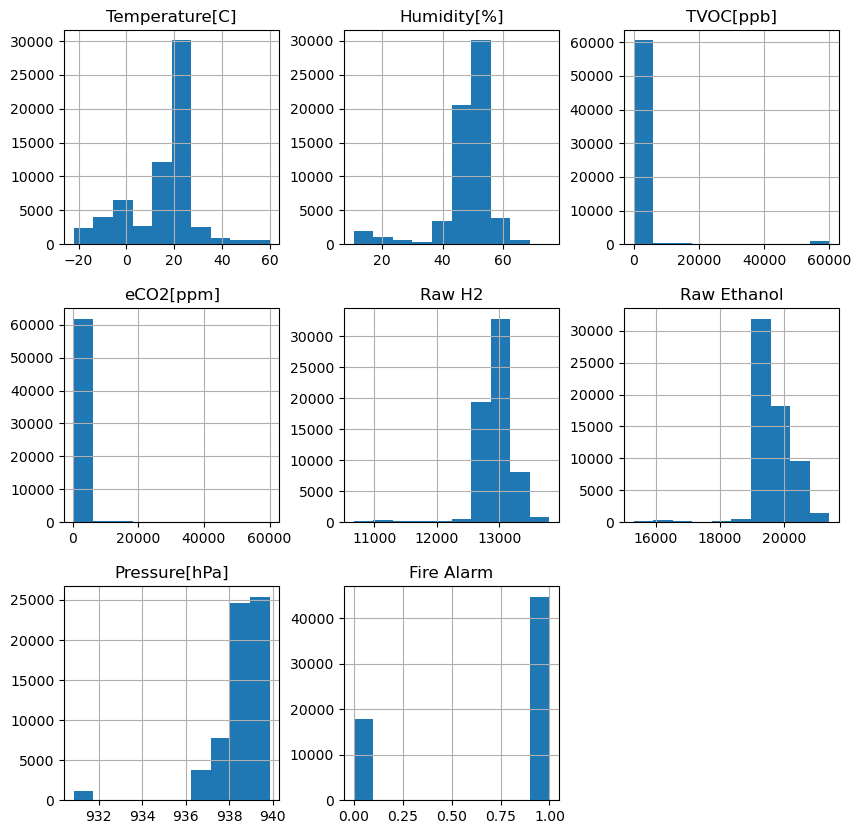

In [56]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data.hist(ax=ax)

<Axes: >

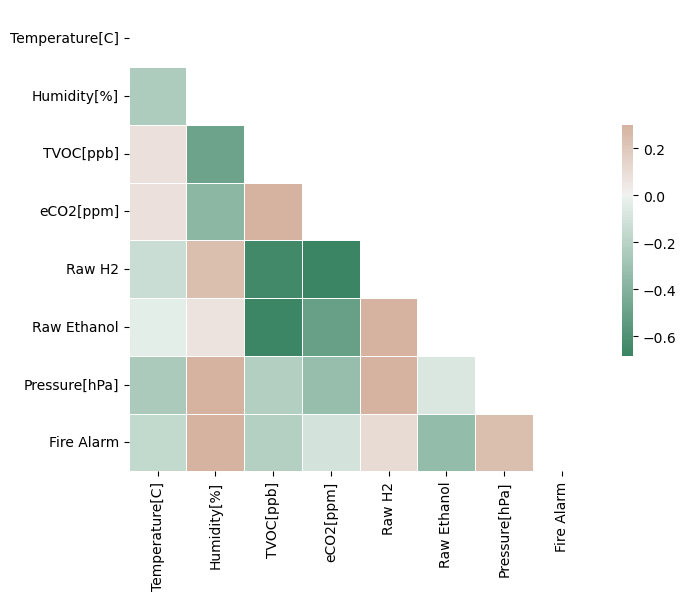

In [57]:
corr2 = data.corr()

mask = np.triu(np.ones_like(corr2, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(150, 30, as_cmap=True)
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Splitting the feature and Target

In [58]:
dfy = data.pop('Fire Alarm')
dfy = pd.DataFrame(dfy, columns=['Fire Alarm'])

# Split train and val dataset



In [59]:
VER = '002'
NUM_STATE = 41
xtrain, xval, ytrain, yval = train_test_split(data, dfy, test_size=0.2, shuffle=True, random_state=NUM_STATE, stratify=dfy)

# Scale data using StandardScaler


In [60]:
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xvalsc = sc.transform(xval)

# Train model using Random Forest


In [61]:
rf = RandomForestClassifier()
rf.fit(xtrainsc, ytrain.to_numpy().ravel())

RandomForestClassifier()

In [62]:
# Running the prediction
ypred = rf.predict(xvalsc)


In [63]:
print("Random Forest Accuracy ",accuracy_score(yval, ypred))



Random Forest Accuracy  0.9997604981638193


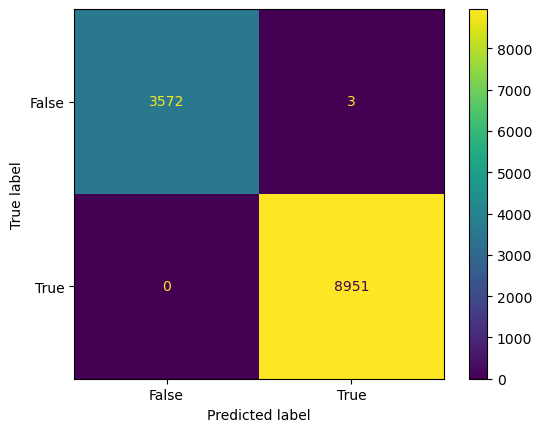

In [66]:
confusion_matrix = confusion_matrix(yval, ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


In [67]:
print("Classification Report ",classification_report(yval, ypred))


Classification Report                precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



<BarContainer object of 7 artists>

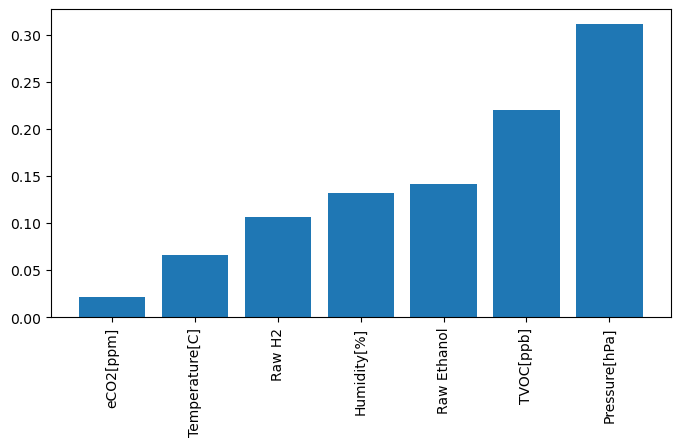

In [68]:
# feature Importance

sorted_idx = rf.feature_importances_.argsort()
rf.feature_importances_[sorted_idx]


plt.figure(figsize=(8,4))
plt.xticks(rotation = 90)
plt.bar(xtrain.columns[sorted_idx], rf.feature_importances_[sorted_idx])

In [72]:
joblib.dump(rf, './smoke-detection-rf.joblib')

joblib.dump(sc, './standardscaler.joblib')



['./standardscaler.joblib']

In [11]:
# Using Robust Scaler as preprocessing because it is robust to outliers.

from sklearn.preprocessing import RobustScaler
data_scaled= RobustScaler()
print(data_scaled)

RobustScaler()


In [12]:
x=data.iloc[:,0:13]
x

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [13]:
y=data.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire Alarm, Length: 62630, dtype: int64

In [14]:
x_scaled=data_scaled.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x_scaled, y, test_size=0.25, random_state=101)

# SVM Modeling

In [16]:
#Import svm model
from sklearn import svm

In [17]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [18]:
#Train the model using the training sets
clf.fit(xtrain, ytrain)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(xtest)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (xtest.shape[0], (ytest != y_pred).sum()))

Number of mislabeled points out of a total 250 points : 2


In [ ]:
print("accuracy:", 1 - (ytest != y_pred).sum()/xtest.shape[0])
svm_accuracy = 1 - (ytest != y_pred).sum()/xtest.shape[0]

accuracy: 0.992


# SVM Confusion Matrix

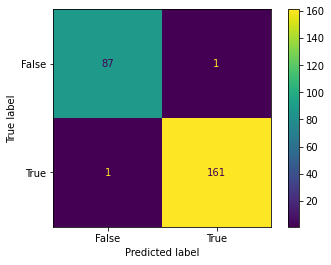

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

# KNN Modeling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(xtest)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (xtest.shape[0], (ytest != y_pred).sum()))

Number of mislabeled points out of a total 250 points : 3


In [ ]:
print("accuracy:", 1 - (ytest != y_pred).sum()/xtest.shape[0])
knn_accuracy = 1 - (ytest != y_pred).sum()/xtest.shape[0]

accuracy: 0.988


# KNN Confusion Matrix

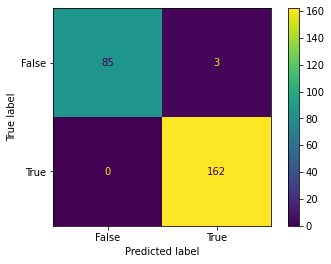

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

# Ensemble learning

# Adaboost Classifier

In [ ]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(xtrain, ytrain)


#Predict the response for test dataset
y_pred = model1.predict(xtest)

In [ ]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(ytest, y_pred))
adaboost_accuracy = accuracy_score(ytest, y_pred)

AdaBoost Classifier Model Accuracy: 1.0


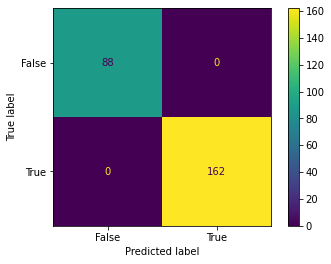

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

# XGBoost Classifier

In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

In [ ]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(ytest, y_pred))
xgboost_accuracy = accuracy_score(ytest, y_pred)

AdaBoost Classifier Model Accuracy: 1.0


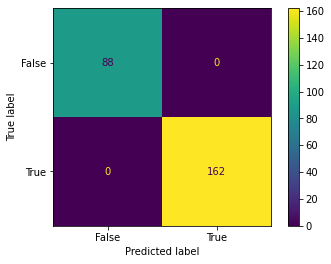

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [ ]:
print("KNN Accuracy: " + str(knn_accuracy))
print("SVM Accuracy: " + str(svm_accuracy))
print("AdaBoost Accuracy: " + str(adaboost_accuracy))
print("XGBoost Accuracy: " + str(xgboost_accuracy))

KNN Accuracy: 0.988
SVM Accuracy: 0.992
AdaBoost Accuracy: 1.0
XGBoost Accuracy: 1.0
